<a href="https://colab.research.google.com/github/noriko-hiroi/Machine-Learning-variations/blob/main/ICT3_20230927.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

単語のベクトル変換

単語の分散行列を用いて変換する

In [ ]:
!wget http://mattmahoney.net/dc/text8.zip

--2023-10-11 04:18:32--  http://mattmahoney.net/dc/text8.zip
Resolving mattmahoney.net (mattmahoney.net)... 34.198.1.81
Connecting to mattmahoney.net (mattmahoney.net)|34.198.1.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31344016 (30M) [application/zip]
Saving to: ‘text8.zip’

text8.zip           100%[===================>]  29.89M  --.-KB/s    in 0.1s    

2023-10-11 04:18:33 (283 MB/s) - ‘text8.zip’ saved [31344016/31344016]



In [ ]:
!unzip text8.zip

Archive:  text8.zip
  inflating: text8                   


In [ ]:
import logging
from gensim.models.word2vec import Word2Vec, Text8Corpus

In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

sentences = Text8Corpus('text8')
model = Word2Vec(sentences, vector_size=100)

model.save('model.bin')

In [ ]:
model = Word2Vec.load('model.bin')

# dogの分散表現ベクトル
print(model.wv['dog'])
print(model.wv['dog'].shape)


[ 0.11809247  0.4512811   1.0130279  -1.6684744   2.1510096  -0.22375609
 -1.8467262   1.2547178  -0.6107512   1.1295806  -0.72974014 -0.03007952
  0.6330046   3.1148798  -1.7816842  -0.5128113   0.48227057 -1.2819283
  0.2708329   0.10422442 -0.98859084  1.1048343  -0.1141338  -2.0433435
 -1.9704336   0.5400039   0.15547232  0.08258142 -0.7986988  -0.9534558
  2.3468988  -1.5923157   0.6719288  -0.86797833 -0.20086622  0.56771946
 -1.2568125  -0.6020936  -1.8775358  -1.3872563   0.87625134  0.9023934
 -0.6754867   0.39136177  1.7728627  -1.0202391   0.1785705  -0.8380516
  0.12386625  1.1897997   2.170431    0.23574327  0.40957016 -0.0439441
  0.03668742 -1.7710724  -0.47257343 -1.3917028  -2.1316638  -0.6672748
 -0.36575684  1.3159441  -2.4127712   1.5586468   0.21956515  0.78486866
 -0.47241393 -0.8987651  -0.35750076 -0.5527903   1.7695627  -0.77903605
 -0.58363664  2.4089017   0.43077618  1.6623634   0.22506495  1.3038867
  0.1308621   1.8175563  -2.192085    0.1483497  -0.2527767

In [ ]:
# carと意味が似ている単語を抽出
model.wv.most_similar(['car'])

[('driver', 0.7881032228469849),
 ('cars', 0.7551908493041992),
 ('motorcycle', 0.714643657207489),
 ('truck', 0.6855698823928833),
 ('taxi', 0.6850064396858215),
 ('vehicle', 0.6808817982673645),
 ('glider', 0.6626836657524109),
 ('racing', 0.6562012434005737),
 ('automobile', 0.6530294418334961),
 ('passenger', 0.6475187540054321)]

類似度はコサイン尺度で計算することができる！

宿題:
Pythonでコサイン尺度を計算する関数cos_sim(v1, v2)を作ってみよう！

In [ ]:
v1 = model.wv['car']
v2 = model.wv['driver']

In [ ]:
print(model.wv.similarity('driver', 'vehicle'))

0.5489122


In [ ]:
import numpy as np
np.dot(v1, v2)

106.25111

In [ ]:
np.linalg.norm(v1)

13.315583

# コサイン尺度の関数定義

In [ ]:
def cos_sim (v1, v2):
  cosine_value = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

  return cosine_value

In [ ]:
cos_sim(v1, v2)

0.7881032

# RNNの実装

入力単語のベクトルは、wordvecのベクトルを使う。
ベクトルの次元は100次元

入力層の出力次元数 = RNN内部での次元数 = 5

In [ ]:
wordvec_size = 100
hidden_size = 5

Wx = np.random.randn(wordvec_size, hidden_size)
b = np.zeros(hidden_size)
print(Wx.shape)
print(b.shape)

(100, 5)
(5,)


In [ ]:
Wx

In [ ]:
a0 = np.dot(v1, Wx) + b
print(a0)

[ 5.54505591  1.28844004 18.78010823 12.73464581 10.04536912]


次に活性化関数tanh()に入力する。

In [ ]:
h0 = np.tanh(a0)
print(h0)

[0.99996948 0.85871743 1.         1.         1.        ]


In [ ]:
def RNN_cell(v):
  wordvec_size = 100
  hidden_size = 5
  Wx = np.random.randn(wordvec_size, hidden_size)
  a = np.dot(v, Wx) + b
  h = np.tanh(a)

  return h

In [ ]:
RNN_cell(v1)

array([ 1.        , -0.98866712, -0.99999987, -1.        ,  0.99999973])

I like dogをベクトルにする。
x0, x1, x2は、100次元のベクトルである。

In [ ]:
x0 = model.wv['i']
x1 = model.wv['like']
x2 = model.wv['dog']

In [ ]:
x0.shape

(100,)

擬似RNNセルに入力して、出力h0, h1, h2を得る。

In [ ]:
h0 = RNN_cell(x0)
h1 = RNN_cell(x1)
h2 = RNN_cell(x2)

In [ ]:
print(h0)
print(h1)
print(h2)

[-0.99792042  0.9999999  -0.99999579  1.          1.        ]
[-0.99999999 -1.         -0.87800905 -0.99870474 -0.99999999]
[ 0.99587854 -0.99999931  1.         -0.99999993  0.99999419]


クエリqを'like'のベクトルとする

In [ ]:
y = model.wv['like']
q = RNN_cell(y)
print(q)

[-0.9898434   1.         -0.99999995 -0.14967497 -1.        ]


宿題(10/11)

1. h0, h1, h2の3つのベクトルに対して、qとの内積a = [a0, a1, a2] を計算してください。
2. 内積aの各要素値を重みとして、h0, h1, h2の重み付き和ベクトルを計算してください。


In [ ]:
a0 = np.dot(h0, q)
a1 = np.dot(h1, q)
a2 = np.dot(h2, q)

In [ ]:
ctx = a0 * h0 + a1 * h1 + a2 * h2

In [ ]:
print(ctx)

[-7.67188863  3.65685159 -7.44541723  3.65946711 -4.01528788]


ポジショナルエンコーディング
文章中の各単語(トークン)に位置情報を与える処理

In [ ]:
import numpy as np

def positional_encoding(pos, i, dim):
  if i//2 == 0:
    return np.sin(pos/10000**(1/dim))
  else:
    return np.cos(pos/10000**((i-1)/dim))

100番目までの位置情報を生成

In [ ]:
for i in range(0, 100):
  print(positional_encoding(1, i, 100))

In [ ]:
pe = np.zeros((30, 100))
for i in range(0,30):
  for j in range(0, 100):
    pe[i][j] = positional_encoding(i, j, 100)

print(pe)

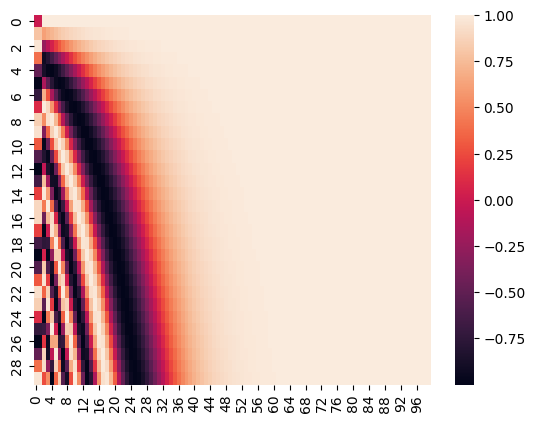

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pe)
plt.show()

In [ ]:
h0 = model.wv['i']
h1 = model.wv['like']
h2 = model.wv['dog']

In [ ]:
h0.shape

(100,)

positional encoding

In [ ]:
pe[0]
print(pe[0].shape)

(100,)


In [ ]:
h0_pe = h0 + pe[0] # I
h1_pe = h1 + pe[1] # like
h2_pe = h2 + pe[2] # dog